# Parcial 3

In [54]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm


## 7.


Partiendo de la ecuación de onda unidimensional dada por la siguiente expresión,

$$
\frac{\partial ^2u}{\partial t^2}=\alpha^2 \frac{\partial^2u}{\partial x^2}
$$

se busca llegar a que esta solución es estable para $\alpha <1$. De este modo, si se realiza la discretización de la ecuación inicial, a partir de los siguientes operadores diferenciales:

$$
\frac{f(x_i,t_{l+1})-2f(x_i,t_{l})+f(x_i,t_{l-1})}{(\Delta x)^2}=\alpha^2\frac{f(x_{i+1},t_{l})-2f(x_i,t_{l})+f(x_{i-1},t_{l})}{(\Delta x)^2}
$$

de modo que para la función $u(x_i,t_i)$ y despejando para $u^{l+1}_i$, se tendría que,

$$
\begin{align*}
u^{l+1}_i&=\alpha^2[u^l_{i+1}-2u_i^{l}+u_{i-1}^l] +2u_i^l-u_i^{l-1}\\
&=\alpha^2(u^l_{i+1}+u_{i-1}^l)+2(1-\alpha^2)u_i^{l}+-u_i^{l-1}
\end{align*}
$$

donde $\alpha=\frac{v\Delta t}{\Delta x}$.


Usando el hecho de que las componentes de Fourierb varían en el espacio como:
$$
u^l_{i\pm 1}=e^{\pm jk\Delta x}u[l,i]
$$

de modo que se llegaría a lo siguientel, al implementar este término en la parte de la discretización que multiplica a $\alpha^2$.

$$
\begin{align*}
u^{l+1}_i-2u_i^l+u_i^{l-1}&=[e^{jk\Delta x}-2+e^{- jk\Delta x}]u_i^l\\
&=-4sin^2 \Big(\frac{k\Delta x}{2} \Big)u_i^l
\end{align*}
$$

ingresando este término en la discretización, se llega a:

$$
\begin{align*}
u^{l+1}_i&=\alpha^2\Big[-4sin^2 \Big(\frac{k\Delta x}{2} \Big)u_i^l\Big] +2u_i^l-u_i^{l-1}\\
&=\Big[2-4\alpha^2sin^2 \Big(\frac{k\Delta x}{2} \Big)\Big]u_i^l-u_i^{l-1}
\end{align*}
$$

dada la condición de estabilidad, se debería cumplir que,

$$
\begin{align*}
2&>-2+4\alpha^2sin^2 \Big(\frac{k\Delta x}{2} \Big)\\
4&>4\alpha^2sin^2 \Big(\frac{k\Delta x}{2} \Big)\\
1&>\alpha^2sin^2 \Big(\frac{k\Delta x}{2} \Big)
\end{align*}
$$


dado que el término del seno, máximo dará 1 para casos donde los modos de Fourier sean muy grandes, entonces,

$$
\alpha^2<1 \Rightarrow |a|<1
$$



## 8.

In [82]:
Nx = 60
Nt = 500
Ny=60
x = np.linspace(-5.,5.,Nx)
y=np.linspace(-5.,5.,Ny)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]
dy=y[1]-y[0]

v = 0.3

In [84]:
def Ti(x,y):
    return 5*np.exp(-(x**2+y**2))

In [85]:
def InitT():
    
    u = np.zeros((Nt,Nx,Ny))
    u[0,:,:] = Ti(x,y)
    return u

In [86]:
u=InitT()

In [78]:
def h1(t):
    return 0. 

In [87]:
def GetSolution(u):
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                u[l,i,j] = dt*(-u[l-1,i,j]*(u[l-1,i+1,j]-u[l-1,i-1,j])/\
                               (2*dx)-u[l-1,i,j]*(u[l-1,i,j+1]-u[l-1,i,j-1])/\
                               (2*dy)+v*((u[l-1,i+1,j]-2*u[l-1,i,j]+u[l-1,i-1,j])/\
                               (dx)**2)+((u[l-1,i,j+1]-2*u[l-1,i,j]+u[l-1,i,j-1])/\
                               (dy)**2))+u[l-1,i,j]

In [ ]:
GetSolution(u)


  5%|▌         | 25/499 [00:00<00:17, 26.97it/s]C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12728\4290206557.py:7: RuntimeWarning: overflow encountered in double_scalars
  u[l,i,j] = dt*(-u[l-1,i,j]*(u[l-1,i+1,j]-u[l-1,i-1,j])/\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12728\4290206557.py:8: RuntimeWarning: overflow encountered in double_scalars
  (2*dx)-u[l-1,i,j]*(u[l-1,i,j+1]-u[l-1,i,j-1])/\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12728\4290206557.py:7: RuntimeWarning: invalid value encountered in double_scalars
  u[l,i,j] = dt*(-u[l-1,i,j]*(u[l-1,i+1,j]-u[l-1,i-1,j])/\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12728\4290206557.py:10: RuntimeWarning: invalid value encountered in double_scalars
  (dx)**2)+((u[l-1,i,j+1]-2*u[l-1,i,j]+u[l-1,i,j-1])/\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12728\4290206557.py:8: RuntimeWarning: invalid value encountered in double_scalars
  (2*dx)-u[l-1,i,j]*(u[l-1,i,j+1]-u[l-1,i,j-1])/\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_127

None


<IPython.core.display.Javascript object>


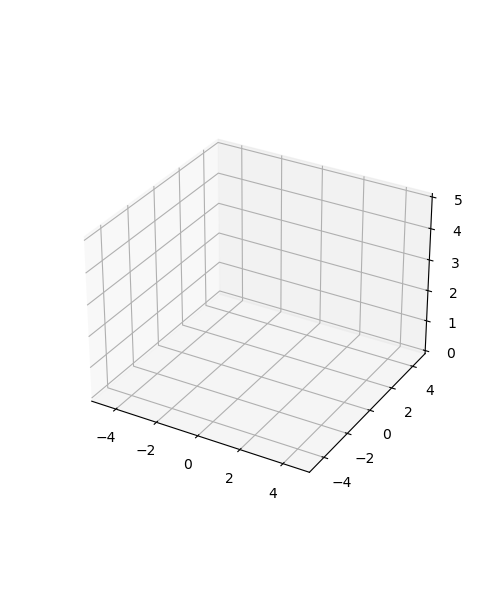

In [72]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,5)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

## 10.